# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### No. NAs

No missing values -> no imputers are needed for this dataset.

In [5]:
# no. NAs

df_nas = pd.DataFrame([(~df.isnull()).sum(), 
                        df.isnull().sum()], index=['no. non-NAs', 'no. NAs']).transpose()
df_nas['NA fraction'] = df_nas['no. NAs'] / (df_nas['no. NAs'] + df_nas['no. non-NAs'])

display(df_nas)

,no. non-NAs,no. NAs,NA fraction
age,41188,0,0.0
job,41188,0,0.0
marital,41188,0,0.0
education,41188,0,0.0
default,41188,0,0.0
housing,41188,0,0.0
loan,41188,0,0.0
contact,41188,0,0.0
month,41188,0,0.0
day_of_week,41188,0,0.0


### Categorical column cardinalities

No categorical features with large cardinalities -> mean target encoding or embedding vectors are not required

In [6]:
df_cardin = pd.Series({column: len(set(df[column])) 
                       for column in df.columns if df[column].dtype == 'object'})

print(df_cardin)

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The dataset contains information related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The business objective associated with this dataset is to improve the effectiveness of marketing campaigns and maximize the return on investment (ROI) for the bank.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

Since there are no features with large cardinality, all features are used instead of only the first seven.

### Average term deposit rate

Dataset has imbalanced classes.

In [9]:
print('output variable values: ', set(df['y']))

output variable values:  {'no', 'yes'}


In [10]:
import numpy as np

mapping = {'no': 0,
           'yes': 1}

df['y'] = df['y'].replace(mapping)

print('Average deposit rate: ', np.mean(df['y']))

Average deposit rate:  0.11265417111780131


### Collecting numerical and categorical features

In [11]:
X = df.drop(['y'], axis=1)
y = df['y']

cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

### Feature handling

In [12]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# use feature standardization for numerical features and one-hot-encoding for categorical features
featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='passthrough'
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Since the classes are imbalanced, a baseline classifier could be one that always predicts the majority class (i.e. no subscription to a term deposit).

In [14]:
baseline_pred_train = np.zeros(y_train.shape)
baseline_pred_test = np.zeros(y_test.shape)

In [15]:
from sklearn.metrics import accuracy_score

print('baseline train accuracy: ', accuracy_score(y_train, baseline_pred_train))
print('baseline test accuracy: ', accuracy_score(y_test, baseline_pred_test))

baseline train accuracy:  0.8880024973119212
baseline test accuracy:  0.8858137088290038


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
from sklearn.linear_model import LogisticRegression

# max iteration limit needs to be increased for this dataset
model = LogisticRegression(max_iter=1000)

# for this first simple model, no grid search exploration of hyper-parameters is used.
pipe = Pipeline([('featureTransformer', featureTransformer),
                 ('model', model)])

pipe.fit(X_train, y_train)

# display pipline
set_config(display="diagram")
display(pipe)    

Pipeline(steps=[('featureTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['loan', 'education',
                                                   'contact', 'day_of_week',
                                                   'housing', 'month',
                                                   'default', 'poutcome', 'job',
                                                   'marital'])])),
                ('model', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:
from sklearn.metrics import log_loss, roc_auc_score, auc, accuracy_score, average_precision_score, \
                            precision_recall_curve, roc_curve

pred = pipe.predict_proba(X_test)[:, 1]
pred_binary = pipe.predict(X_test)

# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, pred)
PR_AUC = auc(recall, precision)

# besides accuracy (which depends on threshold setting), also calculate
# more fundamental metrics of log-loss, ROC-AUC, and PR-AUC
print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))

# 2 different methods for calculating PR-AUC
print('PR-AUC: ', PR_AUC, average_precision_score(y_test, pred))

accuracy:  0.9123573682932751
log-loss:  0.2075460443488563
ROC-AUC:  0.9386514793387498
PR-AUC:  0.6062171326304615 0.6067901862555148


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

SVM has the longest training time, as it is more complex than the other models.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
import pandas as pd

# for this first comparison, just use default model settings
modelNames = ['LogisticRegression', 'KNN', 'DecisionTree', 'SVM']
accs_train = []
accs_test = []
fitTimes = []
for model in [LogisticRegression(max_iter=1000),
              KNeighborsClassifier(), 
              DecisionTreeClassifier(),
              SVC()]:
    
    pipe = Pipeline([('featureTransformer', featureTransformer),
                     ('model', model)])  
    
    start = time() 
    pipe.fit(X_train, y_train)
    stop = time()
    fitTimes.append(stop - start)      
    
    pred_train = pipe.predict(X_train)
    pred_test = pipe.predict(X_test)
    accs_train.append(accuracy_score(y_train, pred_train))
    accs_test.append(accuracy_score(y_test, pred_test))
    
data = {'Model': modelNames,
        'Train Time': fitTimes,
        'Train Accuracy': accs_train,
        'Test Accuracy': accs_test}

display(pd.DataFrame(data))

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression,0.311137,0.910756,0.912357
1,KNN,0.061059,0.928514,0.901756
2,DecisionTree,0.193467,1.000000,0.887432
3,SVM,8.474789,0.924526,0.911386


Also compare models in terms of more fundamental metrics log-loss, ROC-AUC, and PR-AUC. With default hyper-parmeter values, Logistic regression and SVM are by far the most accurate models for this dataset.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt

# set probability setting to true for SVM, which significantly increases fitting time, but allows 
# for evaluation for log-loss, ROC-AUC, and PR-AUC.
train_logloss = []
train_ROC_AUC = []
train_PR_AUC = []
test_logloss = []
test_ROC_AUC = []
test_PR_AUC = []
modelNames = ['LogisticRegression', 'KNN', 'DecisionTree', 'SVM']
for model in [LogisticRegression(max_iter=1000),
              KNeighborsClassifier(), 
              DecisionTreeClassifier(),
              SVC(probability=True)]:
    pipe = Pipeline([('featureTransformer', featureTransformer),
                     ('model', model)])  
    
    pipe.fit(X_train, y_train)
    
    pred_train = pipe.predict_proba(X_train)[:, 1]
    pred_test = pipe.predict_proba(X_test)[:, 1]
    
    train_logloss.append(log_loss(y_train, pred_train))
    test_logloss.append(log_loss(y_test, pred_test))
    train_ROC_AUC.append(roc_auc_score(y_train, pred_train))
    test_ROC_AUC.append(roc_auc_score(y_test, pred_test))
    train_PR_AUC.append(average_precision_score(y_train, pred_train))
    test_PR_AUC.append(average_precision_score(y_test, pred_test))
    
data = {'Model': modelNames,
        
        'Train logloss': train_logloss,
        'Train ROC-AUC': train_ROC_AUC,
        'Train PR-AUC': train_PR_AUC,
        
        'Test logloss': test_logloss,
        'Test ROC-AUC': test_ROC_AUC,
        'Test PR-AUC': test_PR_AUC}

display(pd.DataFrame(data))

,Model,Train logloss,Train ROC-AUC,Train PR-AUC,Test logloss,Test ROC-AUC,Test PR-AUC
0,LogisticRegression,2.076046e-01,0.934923,0.597927,0.207546,0.938651,0.606790
1,KNN,1.388006e-01,0.963624,0.706845,0.803810,0.869625,0.496752
2,DecisionTree,9.992007e-16,1.000000,1.000000,3.773400,0.735531,0.331618
3,SVM,2.025943e-01,0.942580,0.727033,0.236716,0.902394,0.620493


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

- Not sure why gender feature is mentioned here, as it is not present in the dataset. Further, no feature selection is applied for models below, as regularization is already applied for logistic regression and SVM, while decision trees inherently already apply feature selection.
- Instead of accuracy, ROC-AUC is used as performance metric as it is more fundamental than accuracy. This is however not done for SVM, to save on calculation time.

See hyper-parameter tuning results for each model below: 

### Logistic regression model tuning

As mentioned, manual feature selection is not applied here, as logistic regression already applies L2 regularization. L2 regularization addresses potential overfitting issues by penalizing large coefficients. L1 regularization is not shown here, as it significantly increases fitting time. However, if L1 regularization would be used, feature selection is explicitly already performed.

In [21]:
from sklearn.feature_selection import SelectFromModel

model = LogisticRegression(max_iter=1e4)

# also explore polynomial combinations for numeric features:
featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(include_bias=False)),            
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='passthrough'
)

param_grid = {
    'model__C': [10**i for i in range(-2, 3)],
    'featureTransformer__num__poly__degree': list(range(1, 3)),
             }

pipe = Pipeline([('featureTransformer', featureTransformer),
                 ('model', model)])

# Use ROC-AUC as scoring criterium.
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)   
grid.fit(X_train, y_train)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred = grid.best_estimator_.predict_proba(X_test)[:, 1]
pred_binary = grid.best_estimator_.predict(X_test)

print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))
print('PR-AUC: ', average_precision_score(y_test, pred))

Best params:  {'featureTransformer__num__poly__degree': 2, 'model__C': 100}
accuracy:  0.9126001456664239
log-loss:  0.19050355449177986
ROC-AUC:  0.9410442578560068
PR-AUC:  0.6395057158815013


### Logistic regression attempt with SMOTE

Accuracy metrics do not seem to be improved when re-balancing classes with SMOTE.

In [26]:
from imblearn.over_sampling import SMOTE

# need to use numerical representation of features with SMOTE
# -> bring featureTransformer out of pipeline and just use polynomial degree of 2
featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(include_bias=False, degree=2)),            
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='passthrough'
)

X_train_ohe = featureTransformer.fit_transform(X_train)
X_test_ohe = featureTransformer.transform(X_test)

sm = SMOTE(random_state=42)
X_train_ohe_res, y_train_res = sm.fit_resample(X_train_ohe, y_train)

model = LogisticRegression(max_iter=1e4)

param_grid = {
    'model__C': [10**i for i in range(-2, 3)],
             }

pipe = Pipeline([('model', model)])

# Use ROC-AUC as scoring criterium
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)   
grid.fit(X_train_ohe_res, y_train_res)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred = grid.best_estimator_.predict_proba(X_test_ohe)[:, 1]
pred_binary = grid.best_estimator_.predict(X_test_ohe)

print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))
print('PR-AUC: ', average_precision_score(y_test, pred))

Best params:  {'model__C': 100}
accuracy:  0.861455045723072
log-loss:  0.33075945404970203
ROC-AUC:  0.9412942448095496
PR-AUC:  0.6243127909785355


In [27]:
# double-check there is no class imbalance for training set after applying SMOTE
np.mean(y_train_res)

0.5

### Attempt with class weights

Use class weights instead of SMOTE to handle class imbalance. Again, accuracy metrics do not seem to be improved.

In [28]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model = LogisticRegression(max_iter=1e4,
                           class_weight={0: class_weights[0], 1: class_weights[1]})

featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(include_bias=False)),            
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='passthrough'
)

param_grid = {
    'model__C': [10**i for i in range(-2, 3)],
    'featureTransformer__num__poly__degree': list(range(1, 3)),
             }

pipe = Pipeline([('featureTransformer', featureTransformer),
                 ('model', model)])

# Use ROC-AUC as scoring criterium
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)   
grid.fit(X_train, y_train)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred = grid.best_estimator_.predict_proba(X_test)[:, 1]
pred_binary = grid.best_estimator_.predict(X_test)

print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))
print('PR-AUC: ', average_precision_score(y_test, pred))

Best params:  {'featureTransformer__num__poly__degree': 2, 'model__C': 100}
accuracy:  0.8593509751557822
log-loss:  0.33177672912655604
ROC-AUC:  0.9423551840016638
PR-AUC:  0.6296005207977758


### Logistic regression model coefficients

Contract duration is an important feature affecting term deposit rate. 'success' outcome of previous marketing campaigns is another important feature affecting term deposit rate, as expected. Employment variation rate is an important feature negatively affecting term deposit rate.
See determined coefficients below.

In [40]:
from sklearn.feature_selection import SelectFromModel

model = LogisticRegression(max_iter=1e4)

# don't use polynomial features for examing model coefficients
featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='passthrough'
)

param_grid = {
    'model__C': [10**i for i in range(-2, 3)],
             }

pipe = Pipeline([('featureTransformer', featureTransformer),
                 ('model', model)])

# Use ROC-AUC as scoring criterium.
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)   
grid.fit(X_train, y_train)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred = grid.best_estimator_.predict_proba(X_test)[:, 1]
pred_binary = grid.best_estimator_.predict(X_test)

print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))
print('PR-AUC: ', average_precision_score(y_test, pred))

Best params:  {'model__C': 1}
accuracy:  0.9123573682932751
log-loss:  0.2075460443488563
ROC-AUC:  0.9386514793387498
PR-AUC:  0.6067901862555148


Text(0, 0.5, 'feature name')

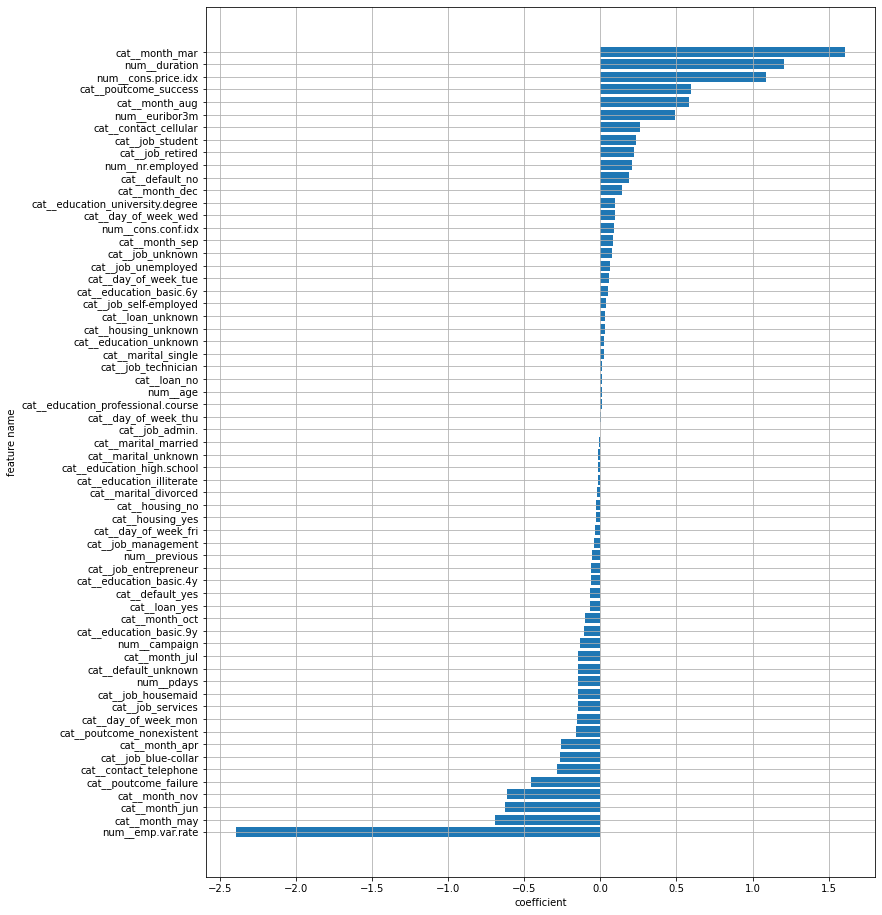

In [46]:
featureNames = grid.best_estimator_.named_steps['featureTransformer'].get_feature_names_out()
coefs = grid.best_estimator_.named_steps['model'].coef_.reshape(-1)

coef_series = pd.Series(dict(zip(featureNames, coefs))).sort_values(key=lambda x: x)

plt.figure(figsize=(12, 16))
plt.barh(coef_series.index, coef_series)
plt.grid()
plt.xlabel('coefficient')
plt.ylabel('feature name')

### K nearest neigbors model tuning

Both ordinal as well as one-hot-encoding feature encoding techniques are attempted.
For one-hot-encoding, new features are formed for every unique feature value, which
may create many new features. For ordinal encoding, feature values are mapped to integer
encoding within the same column. For the latter technique, unrelated feature categories could be grouped together, unlike one-hot-encoding, and is therefore an inferior technique to one-hot-encoding. However, it might be less affected by overfitting.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

model = KNeighborsClassifier()

# explore both one-hot-encoding and ordinal encoding (same as label encoding).
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
ordinalEncoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', ordinalEncoder)                         
            # ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='passthrough'
)

param_grid = {
    'model__n_neighbors': [i for i in range(1, 200, 10)],    
    'featureTransformer__cat__encoder': [oneHotEncoder, ordinalEncoder]    
             }

pipe = Pipeline([('featureTransformer', featureTransformer),  
                 ('model', model)])

# Use ROC-AUC as scoring criterium for 5-fold cross validation hyper-parameter selection. 
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)   
grid.fit(X_train, y_train)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred = grid.best_estimator_.predict_proba(X_test)[:, 1]
pred_binary = grid.best_estimator_.predict(X_test)

print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))
print('PR-AUC: ', average_precision_score(y_test, pred))

Best params:  {'featureTransformer__cat__encoder': OneHotEncoder(handle_unknown='ignore'), 'model__n_neighbors': 91}
accuracy:  0.9072590434571498
log-loss:  0.2110235958242015
ROC-AUC:  0.9332916839486363
PR-AUC:  0.6130022437285121


### Decision tree model tuning

Decision trees do not require feature scaling. 
Further, both ordinal as well as one-hot-encoding feature encoding techniques are attempted.

In [88]:
from sklearn.preprocessing import OrdinalEncoder

model = DecisionTreeClassifier()

# explore both one-hot-encoding and ordinal encoding (same as label encoding).
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
ordinalEncoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

featureTransformer = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('encoder', ordinalEncoder)             
        ]), cat_cols),        
    ],
    remainder='passthrough'
)

# attempt max depth, pruning, and max feature settings to address potential overfitting
param_grid = {
    'model__max_depth': range(1, 9, 2),
    'model__ccp_alpha': [0, 0.01],
    'model__max_features': [None, 'sqrt', 'log2'],
    'featureTransformer__cat__encoder': [oneHotEncoder, ordinalEncoder]
             }

pipe = Pipeline([('featureTransformer', featureTransformer),  
                 ('model', model)])

# Use ROC-AUC as scoring criterium.  
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='roc_auc', cv=5)   
grid.fit(X_train, y_train)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred = grid.best_estimator_.predict_proba(X_test)[:, 1]
pred_binary = grid.best_estimator_.predict(X_test)

print('accuracy: ', accuracy_score(y_test, pred_binary))
print('log-loss: ', log_loss(y_test, pred))
print('ROC-AUC: ', roc_auc_score(y_test, pred))
print('PR-AUC: ', average_precision_score(y_test, pred))

Best params:  {'featureTransformer__cat__encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 'model__ccp_alpha': 0, 'model__max_depth': 5, 'model__max_features': None}
accuracy:  0.9121145909201263
log-loss:  0.2079233149422013
ROC-AUC:  0.9211035845448836
PR-AUC:  0.6060330860807361


### Support vector machine model tuning

As mentioned before, probability setting is turned off to save on cumputation time. That means that only accuracy at 50% threshold is considered here. Both one-hot-encoding and ordinal encoding are explored.

In [89]:
from sklearn.feature_selection import SelectFromModel

# switch off probability setting
model = SVC(probability=False)

# explore one-hot-encoding and ordinal encoding.
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
ordinalEncoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

featureTransformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('encoder', ordinalEncoder)
        ]), cat_cols)
    ],
    remainder='passthrough'
)

param_grid = {
    'model__C': [10**i for i in range(-2, 3)],
    'featureTransformer__cat__encoder': [oneHotEncoder, ordinalEncoder]    
             }

pipe = Pipeline([('featureTransformer', featureTransformer),  
                 ('model', model)])

# Use accuracy as scoring criterium
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', cv=5)   
grid.fit(X_train, y_train)

# print 'best' hyper-parameters found from grid search
best_params = grid.best_params_
print('Best params: ', best_params)

# apply 'best' model on hold-out test set
pred_binary = grid.best_estimator_.predict(X_test)

print('accuracy: ', accuracy_score(y_test, pred_binary))

Best params:  {'featureTransformer__cat__encoder': OneHotEncoder(handle_unknown='ignore'), 'model__C': 1}
accuracy:  0.9108197782633325


# SUMMARY

The dataset contains information related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The business objective associated with this dataset is to improve the effectiveness of marketing campaigns and maximize the return on investment (ROI) for the bank.

K-nearest neighbors, logistic regression, decision trees, and support vector machines were trained and evaluated using appropriate performance metrics such as accuracy, ROC-AUC, PR-AUC, and log-loss. On this dataset, it appeared that logistic regression and support vector machines had best accuracy on a hold-out test set. For final model choice, the recommendation is to use logistic regression, due to its good accuracy and relatively low complexity (and thus low training time) compared to SVMs. In addition, logistic regression allows for model interpretability, and thus an understanding of the relationships between features and target variable (i.e. subscription to a term deposit). Several important features affecting term deposit rate were identified. For marketing campaigns, focusing on clients exhibiting these features can optimize marketing efficiency and resource allocation.

Further, for the logistic regression model, special attention was given to techniques handling the class imbalance, namely SMOTE and class weighting. However, for this dataset, accuracy metrics did not improve with these techniques.

##### Questions

In [95]:
pred_binary.mean()


0.0690296997653152

array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])